First model to practice the process and upload to Kaggle.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [56]:
pd.options.display.max_columns = 999

Step 1) Reading Data Dict and read in data.

In [11]:
df = pd.read_csv('../datasets/train.csv')
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


Step 2) Feature selection (only looking at numerical with no null values)

In [19]:
df._get_numeric_data().isnull().sum()

Id                   0
PID                  0
MS SubClass          0
Lot Frontage       330
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        22
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      114
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
SalePrice            0
dtype: int64

In [20]:
features = ['Overall Cond', '1st Flr SF']

Step 3) Investigate the Features

In [22]:
df['Overall Cond'].describe()

count    2051.000000
mean        5.562165
std         1.104497
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: Overall Cond, dtype: float64

In [23]:
df['1st Flr SF'].describe()

count    2051.000000
mean     1164.488055
std       396.446923
min       334.000000
25%       879.500000
50%      1093.000000
75%      1405.000000
max      5095.000000
Name: 1st Flr SF, dtype: float64

Step 4) Feature Engineering (skip)

Step 5) Set Features and the Y

In [24]:
X = df[features]
y = df['SalePrice']

In [25]:
# Instantiate the model

lr = LinearRegression()

Step 6) Cross-val Score

In [27]:
cross_val_score(lr, X, y).mean()

0.3809836080789208

Step 7) Fit the model

In [28]:
lr.fit(X, y)

LinearRegression()

Step 8) Train, Test, Split

Be careful with what you label the test.

In [36]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, random_state = 32)

In [37]:
#Train Score

lr.score(X_train, y_train)

0.37915576177172294

In [38]:
#Test score

lr.score(X_validate, y_validate)

0.38996157009845633

In [39]:
cross_val_score(lr, X_train, y_train).mean()

0.37518123742592896

At first, the r2 scores were varied by 10% points. To see if this happened be to due to a bad sample, I changed the random_state and the variances evened out. So now we have no high variance. But the Bias could be due to the irreducable error. So we are going to look at a residual plot. 

In [40]:
pred = lr.predict(X)

In [42]:
residuals = y - pred

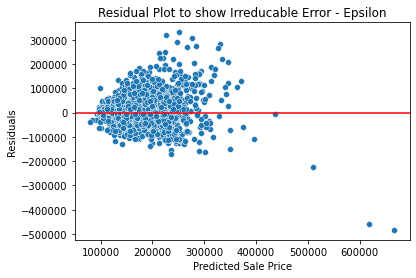

In [46]:
plt.axhline(y = 0, color='r')
sns.scatterplot(x = pred, y = residuals)
plt.title('Residual Plot to show Irreducable Error - Epsilon')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals');

In [48]:
residuals.sort_values()

1885   -483331.147175
960    -457396.098216
616    -224434.261580
1023   -170016.750755
1656   -164276.178443
            ...      
1671    281852.946393
823     291459.278896
1692    307940.006198
138     318696.127361
1796    330956.690424
Name: SalePrice, Length: 2051, dtype: float64

In [61]:
X.loc[[1885]]
#df.loc[[1885]] shows all columns for one row.

,Overall Cond,1st Flr SF
1885,5,5095


In [66]:
pred[1885] #Predicted sales price

667181.1471751487

In [68]:
y[1885] #True sales price

183850

In [62]:
X.loc[[960]]

,Overall Cond,1st Flr SF
960,5,4692


In [67]:
pred[960]

617396.0982158129

In [60]:
X.loc[[616]]

,Overall Cond,1st Flr SF
616,7,3820


In [65]:
pred[616]

509134.261580327

Read in test.csv for Kaggle

In [69]:
df_test = pd.read_csv('../datasets/test.csv')

In [71]:
pred_test = lr.predict(df_test[features])

In [73]:
pred_test.shape

(878,)

Create a Sale Price column inside of df_test

In [74]:
df_test['SalePrice'] = pred_test

In [76]:
model1_submission = df_test[['Id', 'SalePrice']]
model1_submission.head()

,Id,SalePrice
0,2658,149127.955612
1,2718,281029.399262
2,2414,119792.680826
3,1989,157078.477719
4,625,209974.035020


In [78]:
model1_submission.set_index('Id', inplace=True) 


KeyError: "None of ['Id'] are in the columns"

In [79]:
model1_submission

,SalePrice
Id,
2658,149127.955612
2718,281029.399262
2414,119792.680826
1989,157078.477719
625,209974.035020
...,...
1662,171408.665508
1234,173610.209537
1373,187366.928421


In [81]:
model1_submission.to_csv('../datasets/Model_submissions/model1_submission.csv') 